In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Read the csv
df = pd.read_csv("../data/raw_data/new_amplitude_export_2025_chunk_0_100000.csv")

In [6]:
# Obtain user data
user_data = df[['city', 'amplitude_id', 'country', 'device_family', 'os_version', 'platform', 'region']]
user_data = user_data.groupby('amplitude_id', as_index=False).agg({
    'city': 'first',
    'country': 'first',
    'device_family': 'first',
    'os_version': 'first',
    'platform': 'first',
    'region': 'first'
})

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=user_data['city'].value_counts > 10, order=user_data['city'].value_counts().index)
plt.title('Count of Records by City')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

TypeError: '>' not supported between instances of 'method' and 'int'

<Figure size 1000x600 with 0 Axes>

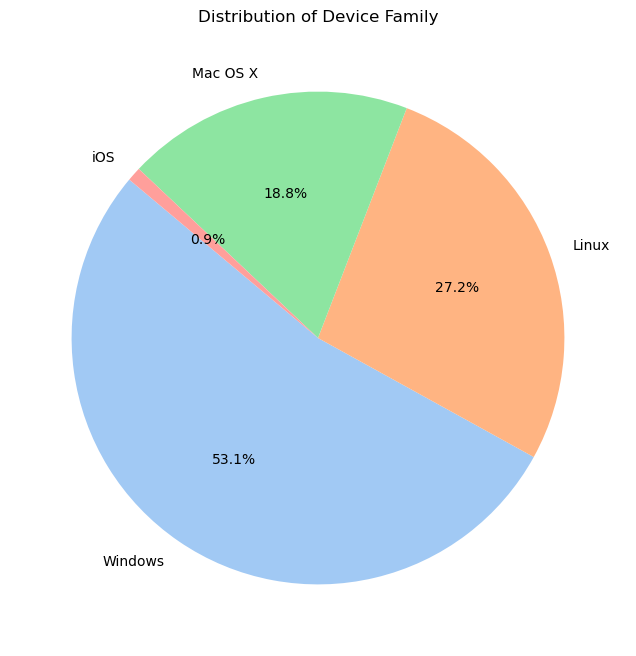

In [9]:
device_counts = user_data['device_family'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Device Family')
plt.show()

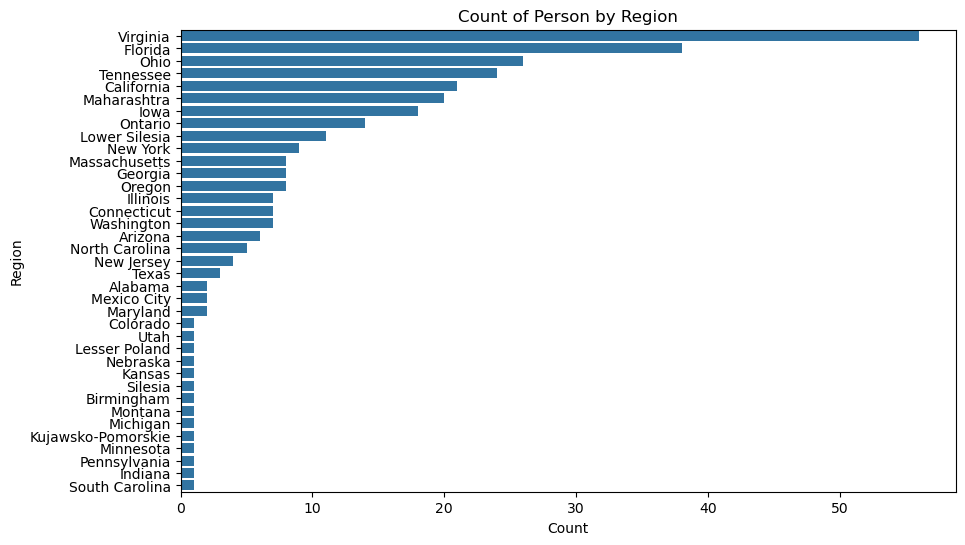

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(y='region', data=user_data, order=user_data['region'].value_counts().index)
plt.title('Count of Person by Region')
plt.xlabel('Count')
plt.ylabel('Region')
plt.show()

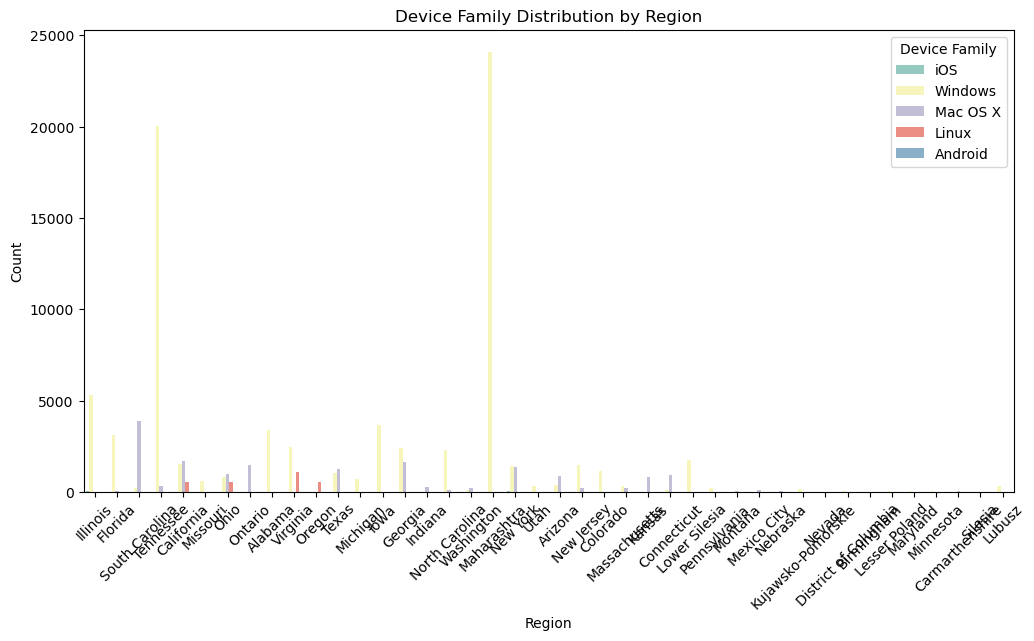

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='region', hue='device_family', data=df, palette='Set3')
plt.title('Device Family Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.legend(title='Device Family')
plt.xticks(rotation=45)
plt.show()